In [1]:

import os
os.chdir('..')
os.chdir('..')
print(os.getcwd())
import rsnapsim as rss
import numpy as np
os.chdir('rsnapsim')
os.chdir('interactive_notebooks')

import numpy as np
import matplotlib.pyplot as plt
import time



poi_strs, poi_objs, tagged_pois,raw_seq = rss.seqmanip.open_seq_file('../gene_files/H2B_withTags.txt')
poi = tagged_pois['1'][0]  #protein object

poi.tag_epitopes['T_Flag'] = [10,20,30,40,50,60,70]
poi.tag_epitopes['T_Hemagglutinin'] = [300,330,340,350]
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = False

colors = ['#00ff51', '#00f7ff']


rss.solver.protein=poi
t = np.linspace(0,500,501)

C:\Users\willi\Documents\GitHub\rSNAPsim
importing C++ models
c++ models loaded successfully
importing C++ tRNA models
importing C++ models
c++ models loaded successfully
importing C++ tRNA models
c++ models loaded successfully


C:\Users\willi\Documents\GitHub\rSNAPsim\rsnapsim\poi.py:315: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


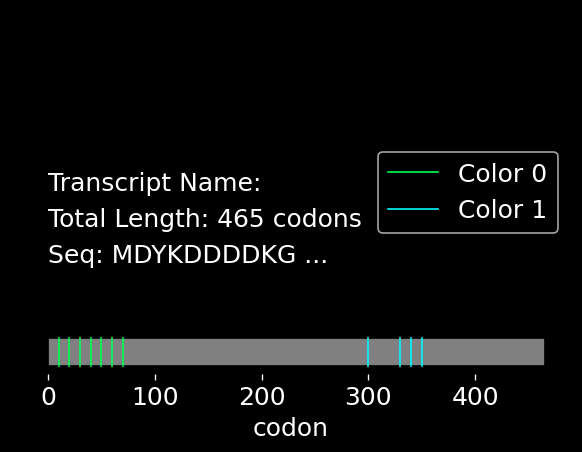

In [2]:
poi.visualize_probe(colors=['#00ff51', '#00f7ff'])


(2, 501, 20)
Low memory, no recording: solved in 0.066023 seconds


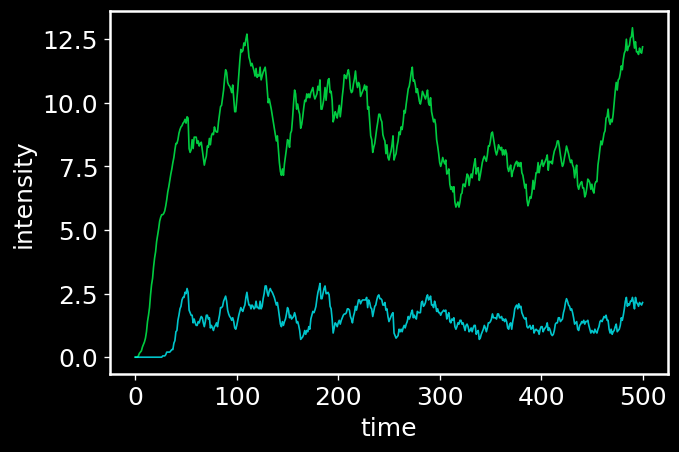

In [3]:
sttime = time.time()
ssa_soln = rss.solver.solve_ssa(poi.kelong,t,ki=.033,n_traj=20)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='#00ff51',alpha=.8)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='#00f7ff',alpha=.8)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)


## Autocovariances with individual means

Text(0, 0.5, 'G(tau)')

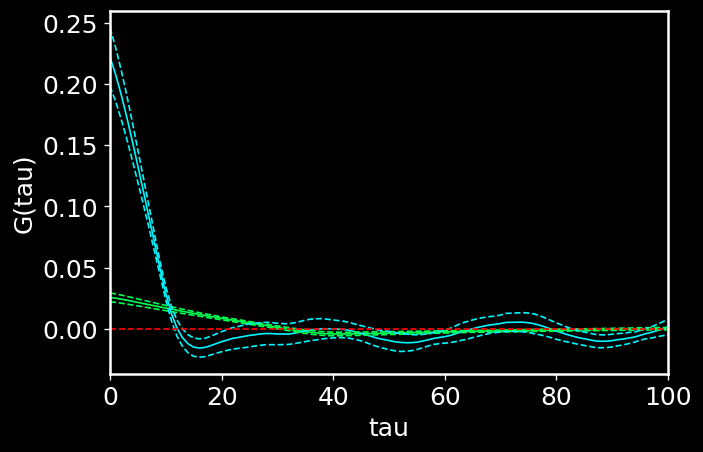

In [4]:
acov,err_acov = rss.inta.get_autocov(ssa_soln.intensity_vec,norm='ind')
plt.plot(np.mean(acov[0],axis=1),color=colors[0]);plt.plot(np.mean(acov[1],axis=1),color=colors[1])
plt.plot(np.mean(acov[0],axis=1) - err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acov[1],axis=1)- err_acov[1],'--',color=colors[1])
plt.plot(np.mean(acov[0],axis=1)+ err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acov[1],axis=1)+ err_acov[1],'--',color=colors[1])
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])
plt.xlabel('tau')
plt.ylabel('G(tau)')

Text(0, 0.5, 'G(tau)')

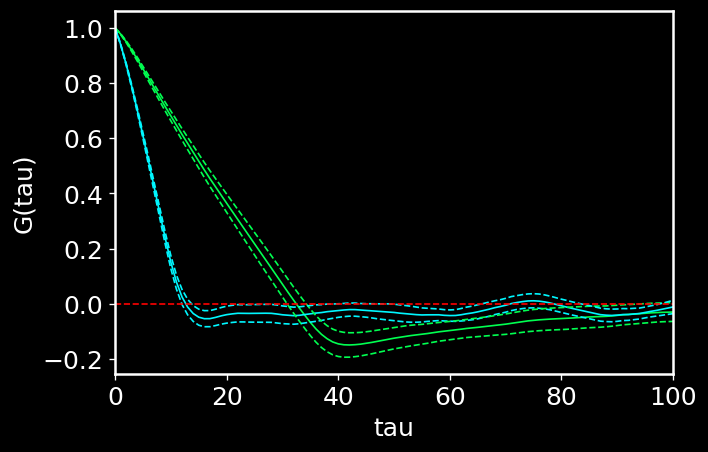

In [5]:
#normalized by G0

acc,acc_err = rss.inta.get_autocorr(acov)
n_traj = acc.shape[-1]

err_acov =  1.0/np.sqrt(n_traj)*np.std(acc,ddof=1,axis=2)


plt.plot(np.mean(acc[0],axis=1),color=colors[0]);plt.plot(np.mean(acc[1],axis=1),color=colors[1])

plt.plot(np.mean(acc[0],axis=1) - err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acc[1],axis=1)- err_acov[1],'--',color=colors[1])
plt.plot(np.mean(acc[0],axis=1)+ err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acc[1],axis=1)+ err_acov[1],'--',color=colors[1])

plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

plt.xlabel('tau')
plt.ylabel('G(tau)')

## Global means

(0.0, 100.0)

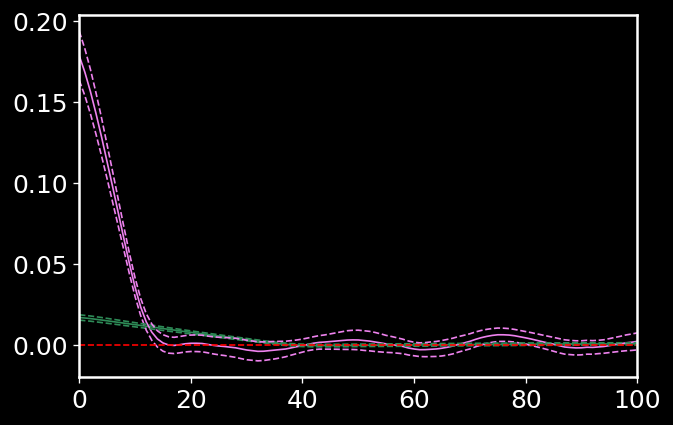

In [6]:
acov,err_acov = rss.inta.get_autocov(ssa_soln.intensity_vec,norm='global')
plt.plot(np.mean(acov[0],axis=1),color='seagreen');plt.plot(np.mean(acov[1],axis=1),color='violet')
plt.plot(np.mean(acov[0],axis=1) - err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)- err_acov[1],'--',color='violet')
plt.plot(np.mean(acov[0],axis=1)+ err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)+ err_acov[1],'--',color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

(0.0, 100.0)

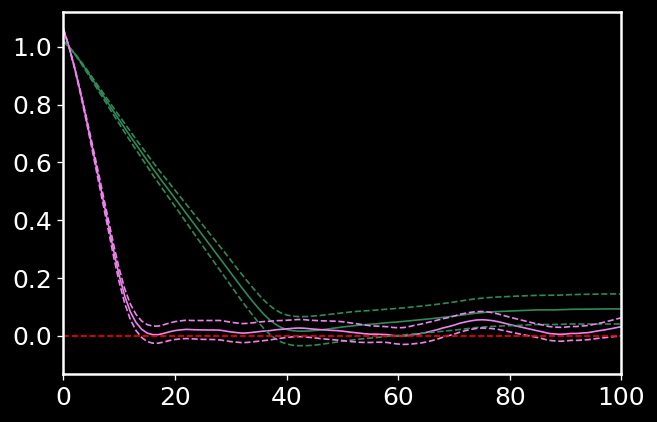

In [7]:
#normalized by G0

acc,acc_error = rss.inta.get_autocorr(acov,g0='G1')
mean_acc = np.mean(acc,axis=2)

plt.plot(mean_acc[0],color='seagreen');plt.plot(mean_acc[1],color='violet')
plt.plot(np.mean(acc[0],axis=1) - acc_error[0],'--',color='seagreen');plt.plot(np.mean(acc[1],axis=1)- acc_error[1],'--',color='violet')
plt.plot(np.mean(acc[0],axis=1)+ acc_error[0],'--',color='seagreen');plt.plot(np.mean(acc[1],axis=1)+ acc_error[1],'--',color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

## Cross correlations

Text(0, 0.5, 'G(tau)')

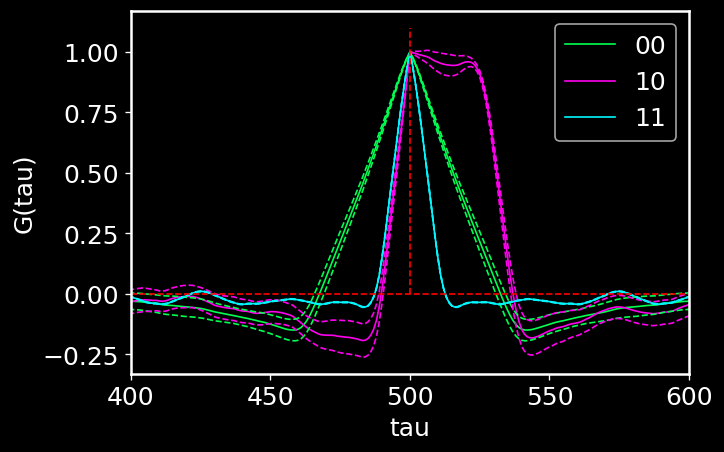

In [8]:
cross_corr,err_cc,inds = rss.inta.get_crosscorr(ssa_soln.intensity_vec,norm='indiv')
plt.figure()

s11_cc = np.mean(cross_corr[0],axis=1)
s12_cc = np.mean(cross_corr[1],axis=1)
s21_cc = np.mean(cross_corr[2],axis=1)
s22_cc = np.mean(cross_corr[3],axis=1)

plt.plot(s11_cc/s11_cc[500],color=colors[0] ); 
plt.plot(s21_cc/s21_cc[500],color='#ff00ee');
plt.plot(s22_cc/s22_cc[500],color=colors[1]);

plt.plot(s11_cc/s11_cc[500] - err_cc[0]/s11_cc[500],'--',color=colors[0] ); 
plt.plot(s11_cc/s11_cc[500] + err_cc[0]/s11_cc[500],'--',color=colors[0] ); 


plt.plot(s21_cc/s21_cc[500] - err_cc[2]/s21_cc[500]  ,'--',color='#ff00ee' ); 
plt.plot(s21_cc/s21_cc[500] + err_cc[2]/s21_cc[500] ,'--',color='#ff00ee'); 

plt.plot(s22_cc/s22_cc[500] - s22_cc[3]/s22_cc[500],'--',color=colors[1] ); 
plt.plot(s22_cc/s22_cc[500] + s22_cc[3]/s22_cc[500],'--',color=colors[1] ); 

plt.plot([500,500],[0,1.1],'r--')
plt.plot([400,600],[0,0],'r--')

plt.legend(['00','10','11' ])
plt.xlim([400,600])
plt.xlabel('tau')
plt.ylabel('G(tau)')

## normalization modes

| norm | effect |
| :- | :-: |
| global | subtract all intensities by the global mean intensity before correlation |
| individual | subtract all intensities by the trajectory mean intensity before correlation |
| raw | do nothing, correlate the intensities as they are |


## G0 

| norm | effect |
| :- | :-: |
| global_max | divide correlations by the global maximum point |
| individual_max | divide correlations by the individual trajectory maximum point |
| global_center | divide correlations by the global average of the center point of the correlation |
| individual_center | divide all correlations by the trajectory center point value |
| None | do nothing, do not normalize the correlations by anything|


Text(0, 0.5, 'G(tau)')

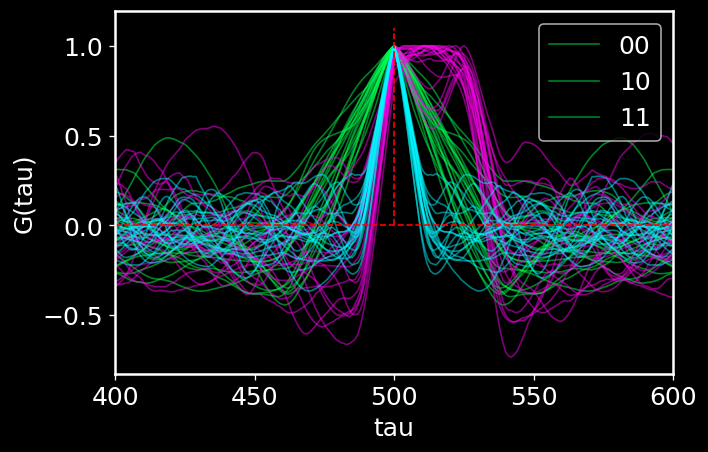

In [11]:
cross_corr,err_cc,inds = rss.inta.get_crosscorr(ssa_soln.intensity_vec,norm='indiv',g0='indiv_max')
plt.figure()

plt.plot(cross_corr[0], color = colors[0],alpha=.5)
plt.plot(cross_corr[2],color = '#ff00ee',alpha=.5)
plt.plot(cross_corr[3], color = colors[1],alpha=.5)


s11_cc = np.mean(cross_corr[0],axis=1)
s12_cc = np.mean(cross_corr[1],axis=1)
s21_cc = np.mean(cross_corr[2],axis=1)
s22_cc = np.mean(cross_corr[3],axis=1)


plt.plot([500,500],[0,1.1],'r--')
plt.plot([400,600],[0,0],'r--')

plt.legend(['00','10','11' ])
plt.xlim([400,600])
plt.xlabel('tau')
plt.ylabel('G(tau)')

Text(0, 0.5, 'G(tau)')

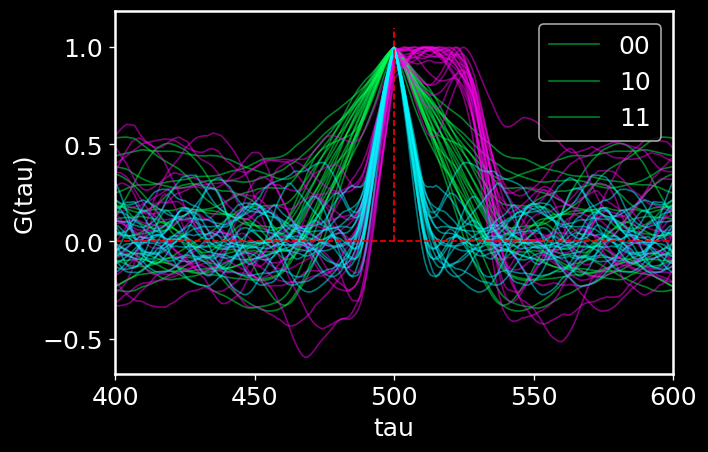

In [10]:
cross_corr,err_cc,inds = rss.inta.get_crosscorr(ssa_soln.intensity_vec,norm='global',g0='indiv_max')
plt.figure()

plt.plot(cross_corr[0], color = colors[0],alpha=.5)
plt.plot(cross_corr[2],color = '#ff00ee',alpha=.5)
plt.plot(cross_corr[3], color = colors[1],alpha=.5)


s11_cc = np.mean(cross_corr[0],axis=1)
s12_cc = np.mean(cross_corr[1],axis=1)
s21_cc = np.mean(cross_corr[2],axis=1)
s22_cc = np.mean(cross_corr[3],axis=1)


plt.plot([500,500],[0,1.1],'r--')
plt.plot([400,600],[0,0],'r--')

plt.legend(['00','10','11' ])
plt.xlim([400,600])
plt.xlabel('tau')
plt.ylabel('G(tau)')